# Handeling Class Imbalance

In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

## Read dataset

In [3]:
img_size=224
batch_size=16

datagen_train = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True,
)
train_generator = datagen_train.flow_from_directory(
    "../dataset/facial_recognition_data/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=True,

)

datagen_test = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True,
)
test_generator = datagen_test.flow_from_directory(
    "../dataset/facial_recognition_data/test",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=True
)
x_test, y_test = next(test_generator)
x_train, y_train = next(train_generator)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## check class imbalance

Class Distribution in Training Set:
angry: 3995 samples
disgust: 436 samples
fear: 4097 samples
happy: 7215 samples
neutral: 4965 samples
sad: 4830 samples
surprise: 3171 samples

Class Distribution in Test Set:
angry: 958 samples
disgust: 111 samples
fear: 1024 samples
happy: 1774 samples
neutral: 1233 samples
sad: 1247 samples
surprise: 831 samples


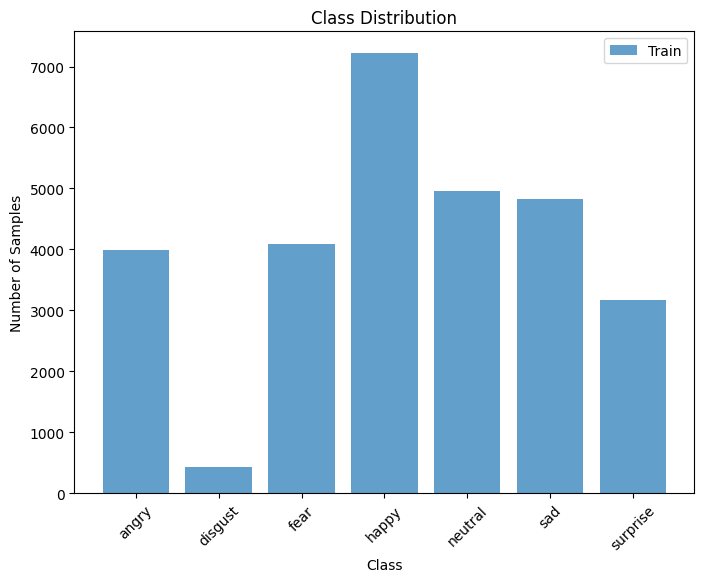

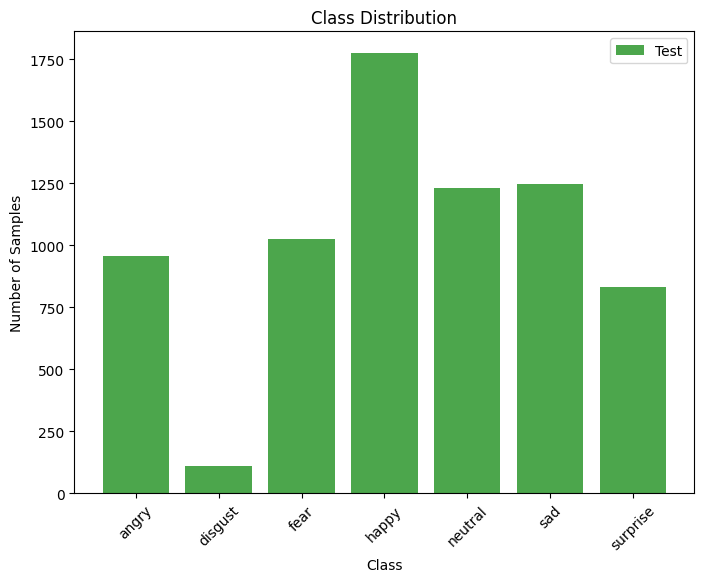

In [3]:
# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Count the number of samples per class in the training set
train_class_counts = np.bincount(train_generator.classes)
test_class_counts = np.bincount(test_generator.classes)

# Print class distribution
print("Class Distribution in Training Set:")
for label, count in zip(class_labels, train_class_counts):
    print(f"{label}: {count} samples")

print("\nClass Distribution in Test Set:")
for label, count in zip(class_labels, test_class_counts):
    print(f"{label}: {count} samples")

plt.figure(figsize=(8, 6))
plt.bar(class_labels, train_class_counts, alpha=0.7, label='Train')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(class_labels, test_class_counts, alpha=0.7, label='Test', color='green')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## filter classes

In [5]:
import os
import shutil

# --- train
# angry: 3995 samples
# disgust: 436 samples X
# fear: 4097 samples
# happy: 7215 samples
# neutral: 4965 samples
# sad: 4830 samples
# surprise: 3171 samples X

desired_classes = ["angry","fear","happy","neutral","sad"]
samples_per_class= 3995

train_dir="../dataset/facial_recognition_data/train"
new_train_dir="../dataset/facial_recognition_data/filtered_train"

if not os.path.exists(new_train_dir):
    os.makedirs(new_train_dir)

for class_name in desired_classes:
    class_path=os.path.join(train_dir,class_name)
    if os.path.exists(class_path):
        os.makedirs(os.path.join(new_train_dir, class_name), exist_ok=True)
        class_files = os.listdir(class_path)[:samples_per_class]  
        for file in class_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(new_train_dir, class_name, file))

print("Filtered dataset created at:", new_train_dir)

Filtered dataset created at: ../dataset/facial_recognition_data/filtered_train


In [6]:
# --- test
# angry: 958 samples
# disgust: 111 samples X
# fear: 1024 samples
# happy: 1774 samples
# neutral: 1233 samples
# sad: 1247 samples
# surprise: 831 samples X

samples_per_class = 950   # Number of samples per class
test_dir = "../dataset/facial_recognition_data/test"
new_test_dir = "../dataset/facial_recognition_data/filtered_test"

# Create the new directory if it doesn't exist
if not os.path.exists(new_test_dir):
    os.makedirs(new_test_dir)

# Copy the desired classes and limit the number of samples
for class_name in desired_classes:
    class_path = os.path.join(test_dir, class_name)
    if os.path.exists(class_path):
        os.makedirs(os.path.join(new_test_dir, class_name), exist_ok=True)
        class_files = os.listdir(class_path)[:samples_per_class]
        for file in class_files:
            shutil.copy(os.path.join(class_path, file), os.path.join(new_test_dir, class_name, file))

print("Filtered dataset created at:", new_test_dir)

Filtered dataset created at: ../dataset/facial_recognition_data/filtered_test


In [7]:
img_size=224
batch_size=16

datagen_train = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True,
)
train_generator = datagen_train.flow_from_directory(
    "../dataset/facial_recognition_data/filtered_train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=True,

)

datagen_test = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True,
)
test_generator = datagen_test.flow_from_directory(
    "../dataset/facial_recognition_data/filtered_test",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=True
)

Found 19975 images belonging to 5 classes.
Found 4750 images belonging to 5 classes.


Class Distribution in Training Set:
angry: 3995 samples
fear: 3995 samples
happy: 3995 samples
neutral: 3995 samples
sad: 3995 samples

Class Distribution in Test Set:
angry: 950 samples
fear: 950 samples
happy: 950 samples
neutral: 950 samples
sad: 950 samples


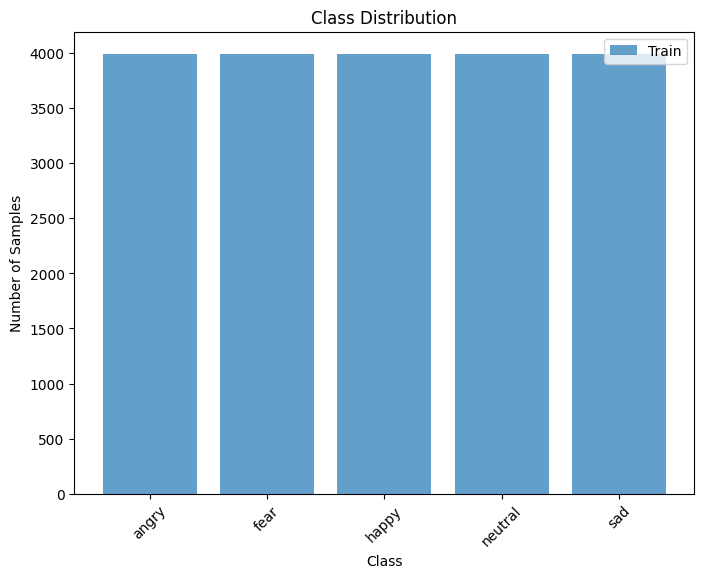

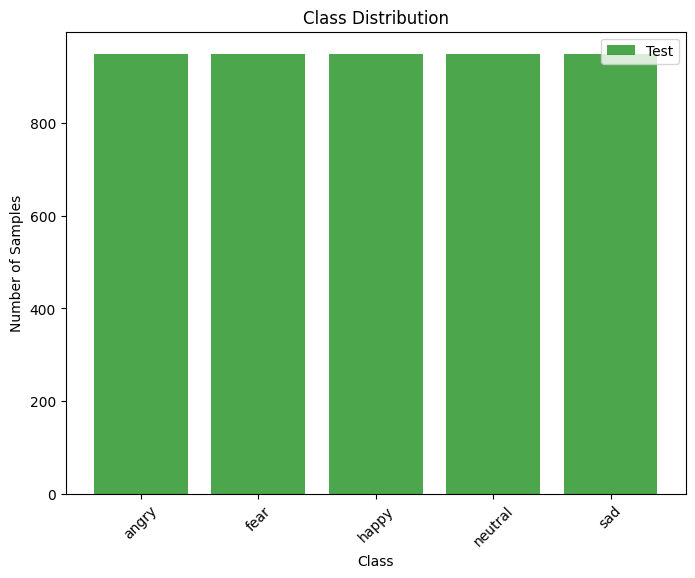

In [8]:
# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Count the number of samples per class in the training set
train_class_counts = np.bincount(train_generator.classes)
test_class_counts = np.bincount(test_generator.classes)

# Print class distribution
print("Class Distribution in Training Set:")
for label, count in zip(class_labels, train_class_counts):
    print(f"{label}: {count} samples")

print("\nClass Distribution in Test Set:")
for label, count in zip(class_labels, test_class_counts):
    print(f"{label}: {count} samples")

plt.figure(figsize=(8, 6))
plt.bar(class_labels, train_class_counts, alpha=0.7, label='Train')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(class_labels, test_class_counts, alpha=0.7, label='Test', color='green')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Under_Sampling and filter
 Reduce Majority Class ==> Randomly remove samples from the majority class to balance tha dataset.

In [16]:
base_model=ResNet50(weights="imagenet",include_top=False,input_shape=(224,224,3))

# Add layers
x = base_model.output
x = Flatten()(x)
x = Dense(512,activation="relu")(x)
x = Dense(256,activation="relu")(x)
x = Dense(128,activation="relu")(x)
x = Dense(64,activation="relu")(x)
output = Dense(7,activation="softmax")(x)

# final model
model=Model(inputs=base_model.input,outputs=output)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable=False

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  
    factor=0.5,               
    patience=10,               
    verbose=1,                 
    min_delta=0.02, 
)

checkpoint_callback_val = tf.keras.callbacks.ModelCheckpoint(
    'best_model_val_CNN.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

checkpoint_callback_train = tf.keras.callbacks.ModelCheckpoint(
    'best_model_train_CNN.keras',
    monitor='accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=40,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint_callback_val,checkpoint_callback_train,reduce_lr],
    verbose=1
)

Epoch 1/40
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2104 - loss: 1.6537
Epoch 1: val_accuracy improved from -inf to 0.20059, saving model to best_model_val_CNN.keras

Epoch 1: accuracy improved from -inf to 0.20958, saving model to best_model_train_CNN.keras
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2354s 2s/step - accuracy: 0.2104 - loss: 1.6537 - val_accuracy: 0.2006 - val_loss: 1.6220 - learning_rate: 5.0000e-04
Epoch 2/40
   1/1248 ━━━━━━━━━━━━━━━━━━━━ 15:39 754ms/step - accuracy: 0.1875 - loss: 1.6472

c:\Users\fatem\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.20059

Epoch 2: accuracy did not improve from 0.20958
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 641us/step - accuracy: 0.1875 - loss: 1.6472 - val_accuracy: 0.0000e+00 - val_loss: 1.6420 - learning_rate: 5.0000e-04
Epoch 3/40
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.2102 - loss: 1.6112
Epoch 3: val_accuracy improved from 0.20059 to 0.20334, saving model to best_model_val_CNN.keras

Epoch 3: accuracy improved from 0.20958 to 0.21158, saving model to best_model_train_CNN.keras
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 713s 571ms/step - accuracy: 0.2102 - loss: 1.6112 - val_accuracy: 0.2033 - val_loss: 1.6037 - learning_rate: 5.0000e-04
Epoch 4/40
   1/1248 ━━━━━━━━━━━━━━━━━━━━ 9:06 439ms/step - accuracy: 0.1875 - loss: 1.6084
Epoch 4: val_accuracy improved from 0.20334 to 0.21429, saving model to best_model_val_CNN.keras

Epoch 4: accuracy did not improve from 0.21158
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1875 - loss: 1.6084

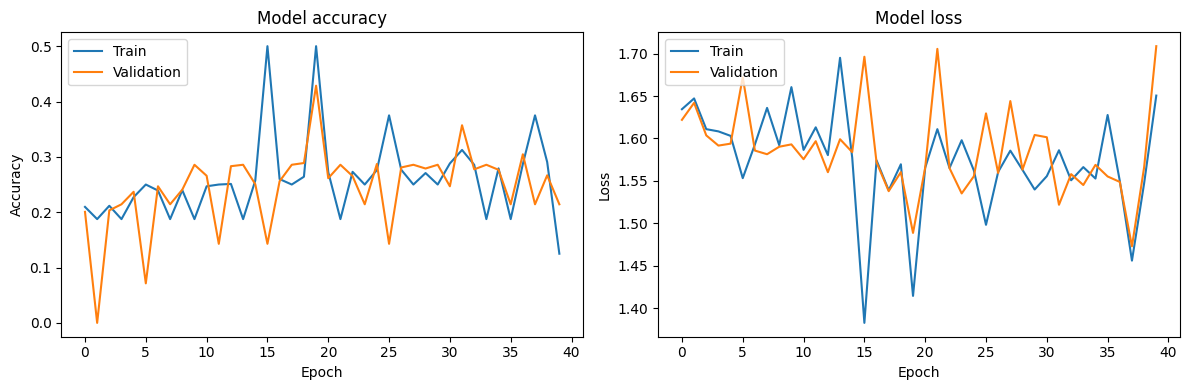

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Focal_loss

In [8]:
import tensorflow as tf

def focal_loss(gamma=2.0, alpha=0.25):
   
    def focal_loss_fixed(y_true, y_pred):
        # Convert y_true to one-hot encoding
        y_true = tf.one_hot(tf.cast(y_true, tf.int32), depth=7)  
        # Clip the predictions to prevent log(0)
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        
        # Calculate focal loss components
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    
    return focal_loss_fixed



In [9]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

# Add layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(7, activation="softmax")(x)

model_2 = Model(inputs=base_model.input, outputs=output)
# Compile the model with focal loss
model_2.compile(optimizer='adam', loss=focal_loss(gamma=2.0, alpha=0.25), metrics=['accuracy'])


In [75]:
history = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=40,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint_callback_val,checkpoint_callback_train,reduce_lr],
    verbose=1
)

Epoch 1/40
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.5558 - loss: 0.1726
Epoch 1: val_accuracy did not improve from 0.70000

Epoch 1: accuracy did not improve from 0.81250
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 1557s 868ms/step - accuracy: 0.5558 - loss: 0.1726 - val_accuracy: 0.5209 - val_loss: 0.1950 - learning_rate: 5.0000e-04
Epoch 2/40
   1/1794 ━━━━━━━━━━━━━━━━━━━━ 21:08 708ms/step - accuracy: 0.6250 - loss: 0.1192
Epoch 2: val_accuracy did not improve from 0.70000

Epoch 2: accuracy did not improve from 0.81250
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.6250 - loss: 0.1192 - val_accuracy: 0.5000 - val_loss: 0.2580 - learning_rate: 5.0000e-04
Epoch 3/40
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.5629 - loss: 0.1676
Epoch 3: val_accuracy did not improve from 0.70000

Epoch 3: accuracy did not improve from 0.81250
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 1559s 869ms/step - accuracy: 0.5629 - loss: 0.1676 - val_accuracy: 0.5349 - val_loss: 0.1892 - lea

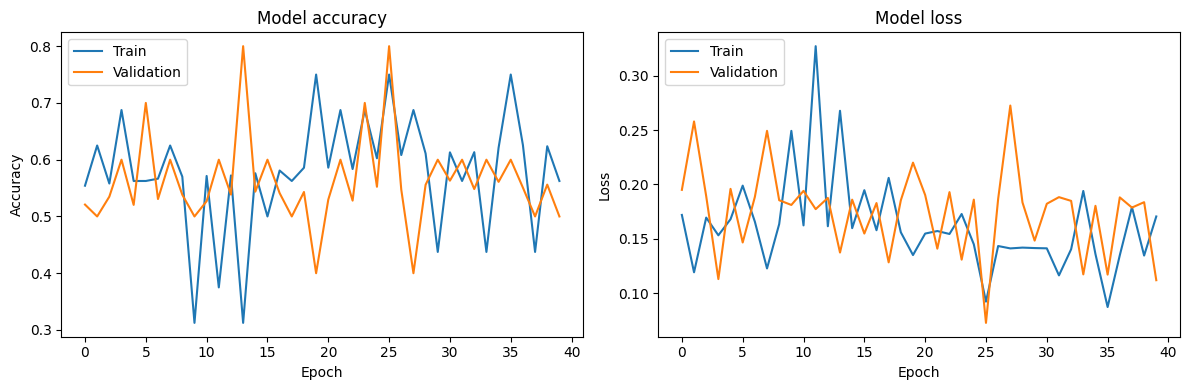

In [76]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [10]:
history = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint_callback_val,checkpoint_callback_train,reduce_lr],
    verbose=1
)

Epoch 1/100


c:\Users\fatem\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1794/1794 ━━━━━━━━━━━━━━━━━━━━ 0s 741ms/step - accuracy: 0.3356 - loss: 0.2884
Epoch 1: val_accuracy improved from -inf to 0.46136, saving model to best_model_val_CNN.keras

Epoch 1: accuracy improved from -inf to 0.38992, saving model to best_model_train_CNN.keras
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 1646s 917ms/step - accuracy: 0.3356 - loss: 0.2884 - val_accuracy: 0.4614 - val_loss: 0.2318 - learning_rate: 0.0010
Epoch 2/100
   1/1794 ━━━━━━━━━━━━━━━━━━━━ 21:30 720ms/step - accuracy: 0.3125 - loss: 0.2135

c:\Users\fatem\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.46136 to 0.50000, saving model to best_model_val_CNN.keras

Epoch 2: accuracy did not improve from 0.38992
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step - accuracy: 0.3125 - loss: 0.2135 - val_accuracy: 0.5000 - val_loss: 0.2455 - learning_rate: 0.0010
Epoch 3/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.4662 - loss: 0.2275
Epoch 3: val_accuracy did not improve from 0.50000

Epoch 3: accuracy improved from 0.38992 to 0.46701, saving model to best_model_train_CNN.keras
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 1610s 897ms/step - accuracy: 0.4662 - loss: 0.2275 - val_accuracy: 0.4823 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 4/100
   1/1794 ━━━━━━━━━━━━━━━━━━━━ 21:16 712ms/step - accuracy: 0.4375 - loss: 0.1905
Epoch 4: val_accuracy improved from 0.50000 to 0.90000, saving model to best_model_val_CNN.keras

Epoch 4: accuracy did not improve from 0.46701
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 2s 648us/step - accuracy: 0.4375 - loss: 0.1905 - val

In [12]:
test_loss, test_accuracy = model_2.evaluate(test_generator, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


449/449 ━━━━━━━━━━━━━━━━━━━━ 330s 736ms/step - accuracy: 0.5698 - loss: 0.1785
Test Loss: 0.18104493618011475
Test Accuracy: 0.5572583079338074


In [26]:
from tensorflow.keras.models import load_model
best_model=load_model("best_model_train_CNN.keras")

TypeError: Could not locate function 'focal_loss_fixed'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'focal_loss_fixed', 'registered_name': 'function'}

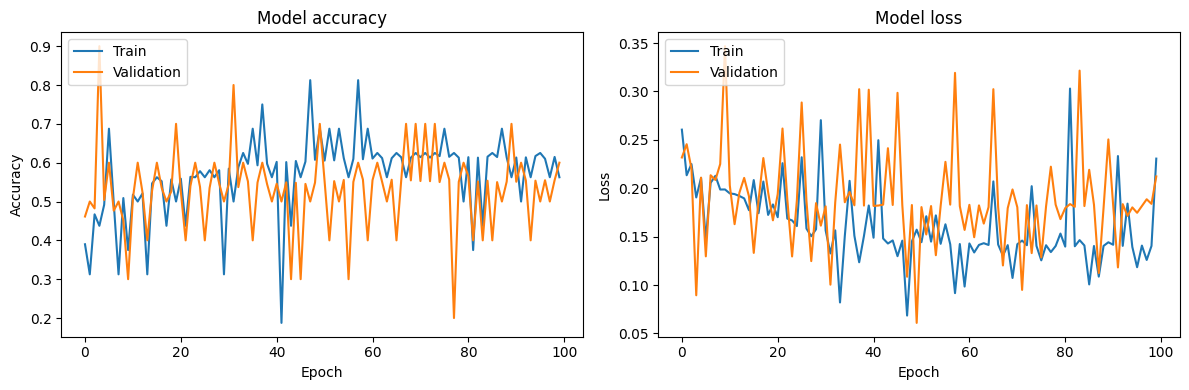

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


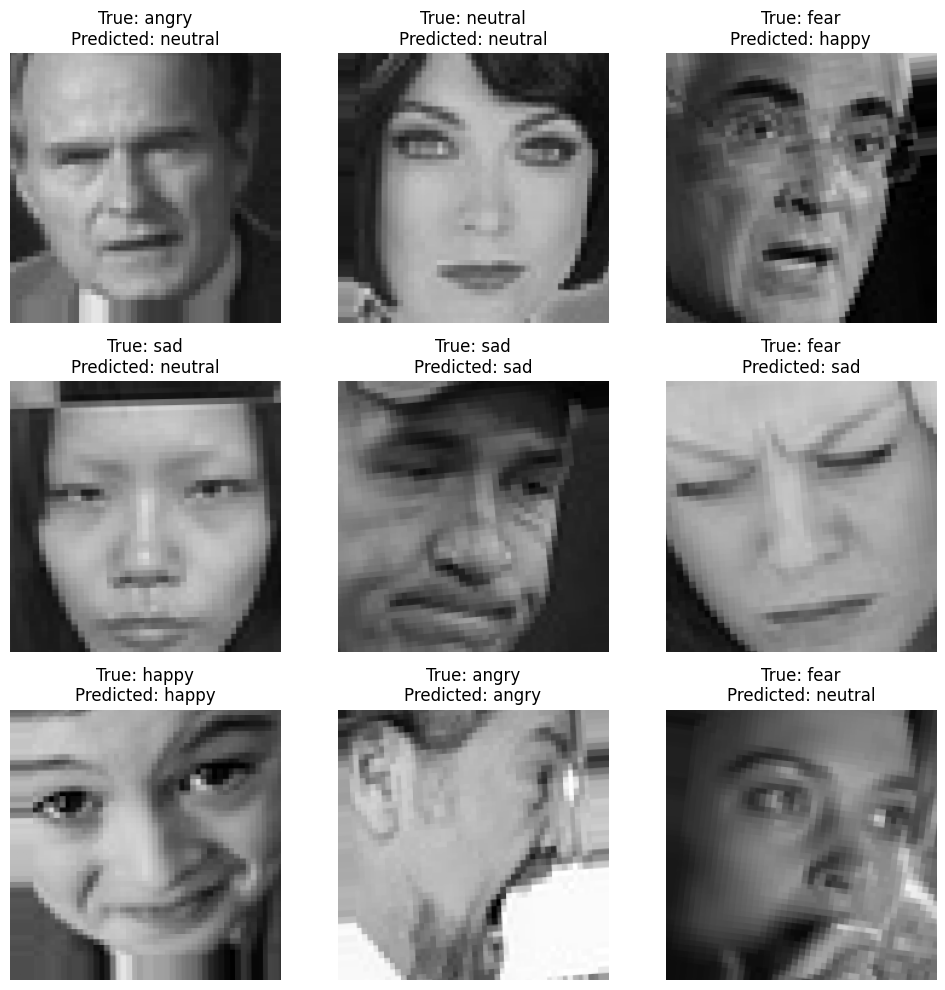

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and true labels from the test generator
x_test, y_test = next(test_generator)

# Predict the classes for the batch
predictions = model_2.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Plot images with true and predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):  # Display first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    
    # Convert the true label to an integer for indexing
    true_label = list(train_generator.class_indices.keys())[int(y_test[i])]
    predicted_label = list(train_generator.class_indices.keys())[predicted_classes[i]]
    
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Class Weights
use class weights to give more importance to the minority.

In [12]:
print(train_generator.class_indices)


{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [13]:
# Check the number of samples per class in train data
class_counts = train_generator.classes
print(np.bincount(class_counts))


[3995  436 4097 7215 4965 4830 3171]


In [15]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert to dictionary
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)  

{0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}


In [20]:
base_model=ResNet50(weights="imagenet",include_top=False,input_shape=(224,224,3))

# Add layers
x = base_model.output
x = Flatten()(x)
x = Dense(512,activation="relu")(x)
x = Dense(256,activation="relu")(x)
x = Dense(128,activation="relu")(x)
x = Dense(64,activation="relu")(x)
output = Dense(7,activation="softmax")(x)

# final model
model_classWeight=Model(inputs=base_model.input,outputs=output)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable=False

model_classWeight.compile(optimizer=Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  
    factor=0.5,               
    patience=10,               
    verbose=1,                 
    min_delta=0.02, 
)

checkpoint_callback_val = tf.keras.callbacks.ModelCheckpoint(
    'best_model_val_ClassWeight.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

checkpoint_callback_train = tf.keras.callbacks.ModelCheckpoint(
    'best_model_train_ClassWeight.keras',
    monitor='accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
history = model_classWeight.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=40,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    class_weight=class_weights_dict,  # Pass the class weights here
    callbacks=[checkpoint_callback_val, checkpoint_callback_train, reduce_lr],
    verbose=1
)

## Data_Augmentation (Over_sampling)

In [4]:
datagen_train = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Rescaling pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for the validation/test set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1.0 / 255.0)

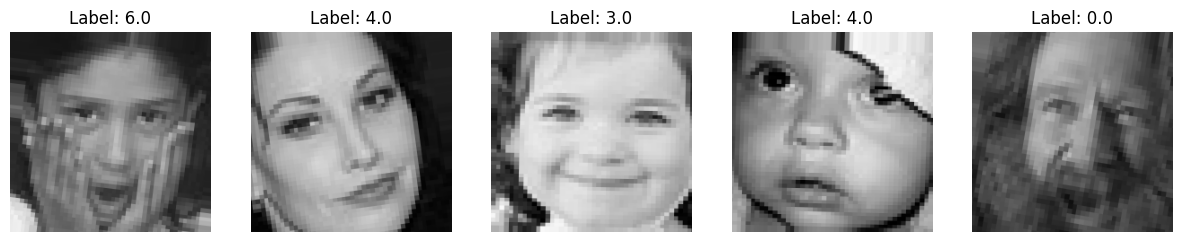

In [5]:
def plot_images(generator, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Get a batch of images and labels
        img, label = next(generator)

        # Plot the first image in the batch
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img[0])  # Display the first image
        plt.title(f"Label: {label[0]}")  # Display the corresponding label
        plt.axis('off')  # Hide the axes
    plt.show()

# Visualize augmented training images
plot_images(train_generator, num_images=5)

In [6]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

# Add layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(7, activation="softmax")(x)

model_vgg = Model(inputs=base_model.input, outputs=output)

model_vgg.compile(optimizer=Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model_vgg.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint_callback_val,checkpoint_callback_train,reduce_lr],
    verbose=1
)  

# accuracy = 62%  # val_accuracy= 100%